# Jason Kabatoff

## Research question/interests

My research interest is to understand how productivity, measured in output per work hour, changes in correlation with certain variables. The variables selected vary by year for annual working hours per worker, GDP per capita, population, and days of vacation in a variety of countries. By investigating these variables, we can determine whether less or more work hours tend to correlate with countries that have higher GDP per capita, but also how those work hours are associated with higher productivities. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("../data/processed/cleaned_combined_data.csv")

In [3]:
print(df.shape)
print(df.nunique(axis=0)) #13 countries in the wrangled data set
df.head()

(910, 7)
Entity                                                                                                                    13
Year                                                                                                                      70
Annual working hours per worker                                                                                          906
GDP per capita (output, multiple price benchmarks)                                                                       910
Population (historical estimates)                                                                                        910
Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)     22
Productivity: output per hour worked                                                                                     910
dtype: int64


,Entity,Year,Annual working hours per worker,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates),Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007),Productivity: output per hour worked
0,Canada,1950,2209.234041,12878.90219,13743068,22.0,13.109432
1,Canada,1951,2194.183546,13025.04615,14085723,22.0,13.310612
2,Canada,1952,2181.939348,13720.40223,14485746,22.0,14.433081
3,Canada,1953,2180.528393,13979.35187,14901533,22.0,15.032083
4,Canada,1954,2172.603665,13520.33396,15323199,22.0,15.145222


In [4]:
print(df.columns)

Index(['Entity', 'Year', 'Annual working hours per worker',
       'GDP per capita (output, multiple price benchmarks)',
       'Population (historical estimates)',
       'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)',
       'Productivity: output per hour worked'],
      dtype='object')


In [5]:
#Probably a good idea to rename columns to something more workable.
df.rename(columns={'Annual working hours per worker': 'Annual Working Hrs', 'GDP per capita (output, multiple price benchmarks)': 'GDP per capita',
                  'Population (historical estimates)': 'Population', 'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)': 'Vacation Days',
                  'Productivity: output per hour worked': 'Productivity'}, inplace=True)

In [6]:
df.describe()

,Year,Annual Working Hrs,GDP per capita,Population,Vacation Days,Productivity
count,910.000000,910.000000,910.000000,9.100000e+02,910.000000,910.000000
mean,1984.500000,1813.722399,27206.721949,4.652565e+07,29.353846,35.445676
std,20.216308,230.991059,14497.845555,6.231216e+07,6.763819,19.346748
min,1950.000000,1380.607643,3857.871568,2.807012e+06,18.000000,4.209353
25%,1967.000000,1645.725923,15217.292065,9.556052e+06,24.000000,19.232580
50%,1984.500000,1802.997862,24526.883720,2.572300e+07,29.000000,33.576284
75%,2002.000000,1963.398584,37603.623035,5.683147e+07,35.000000,49.750285
max,2019.000000,2428.279448,102622.448900,3.343197e+08,44.000000,125.092536


In [7]:
#Seeing the correlation between the given productivity value, and one calculated by us.
df['Calculated Productivity'] = 2*df['GDP per capita']/df['Annual Working Hrs'] 


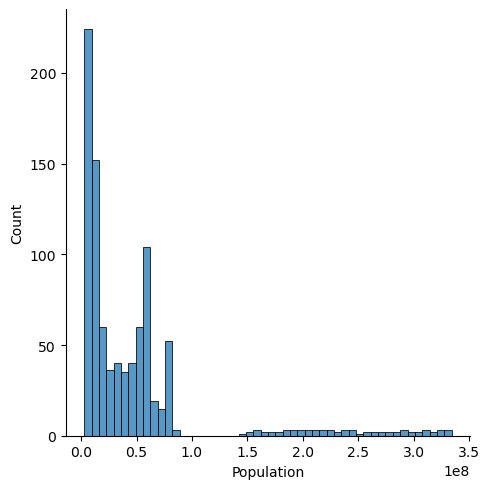

In [8]:
#Most of our data is looking at countries/years with populations of less than 100million, 
#while a few exceptions are in the >100 million population range
sns.displot(df['Population'], bins = 50)

In [9]:
df.loc[df['Population'] > 100000000].nunique(axis=0)
#Looks like there is 70 rows of data with populations of greater than 100 million all for a single unique country

Entity                      1
Year                       70
Annual Working Hrs         70
GDP per capita             70
Population                 70
Vacation Days               4
Productivity               70
Calculated Productivity    70
dtype: int64

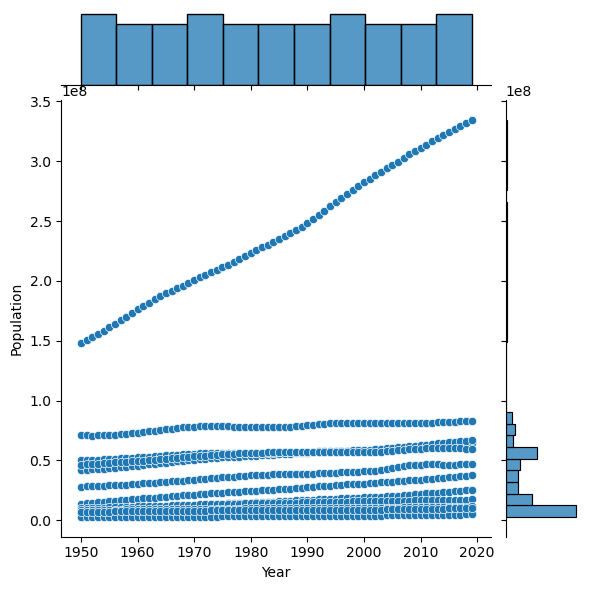

In [10]:
sns.jointplot(x='Year', y='Population', data = df)
#Again, one single country, the US, dominating in terms of population for our data.

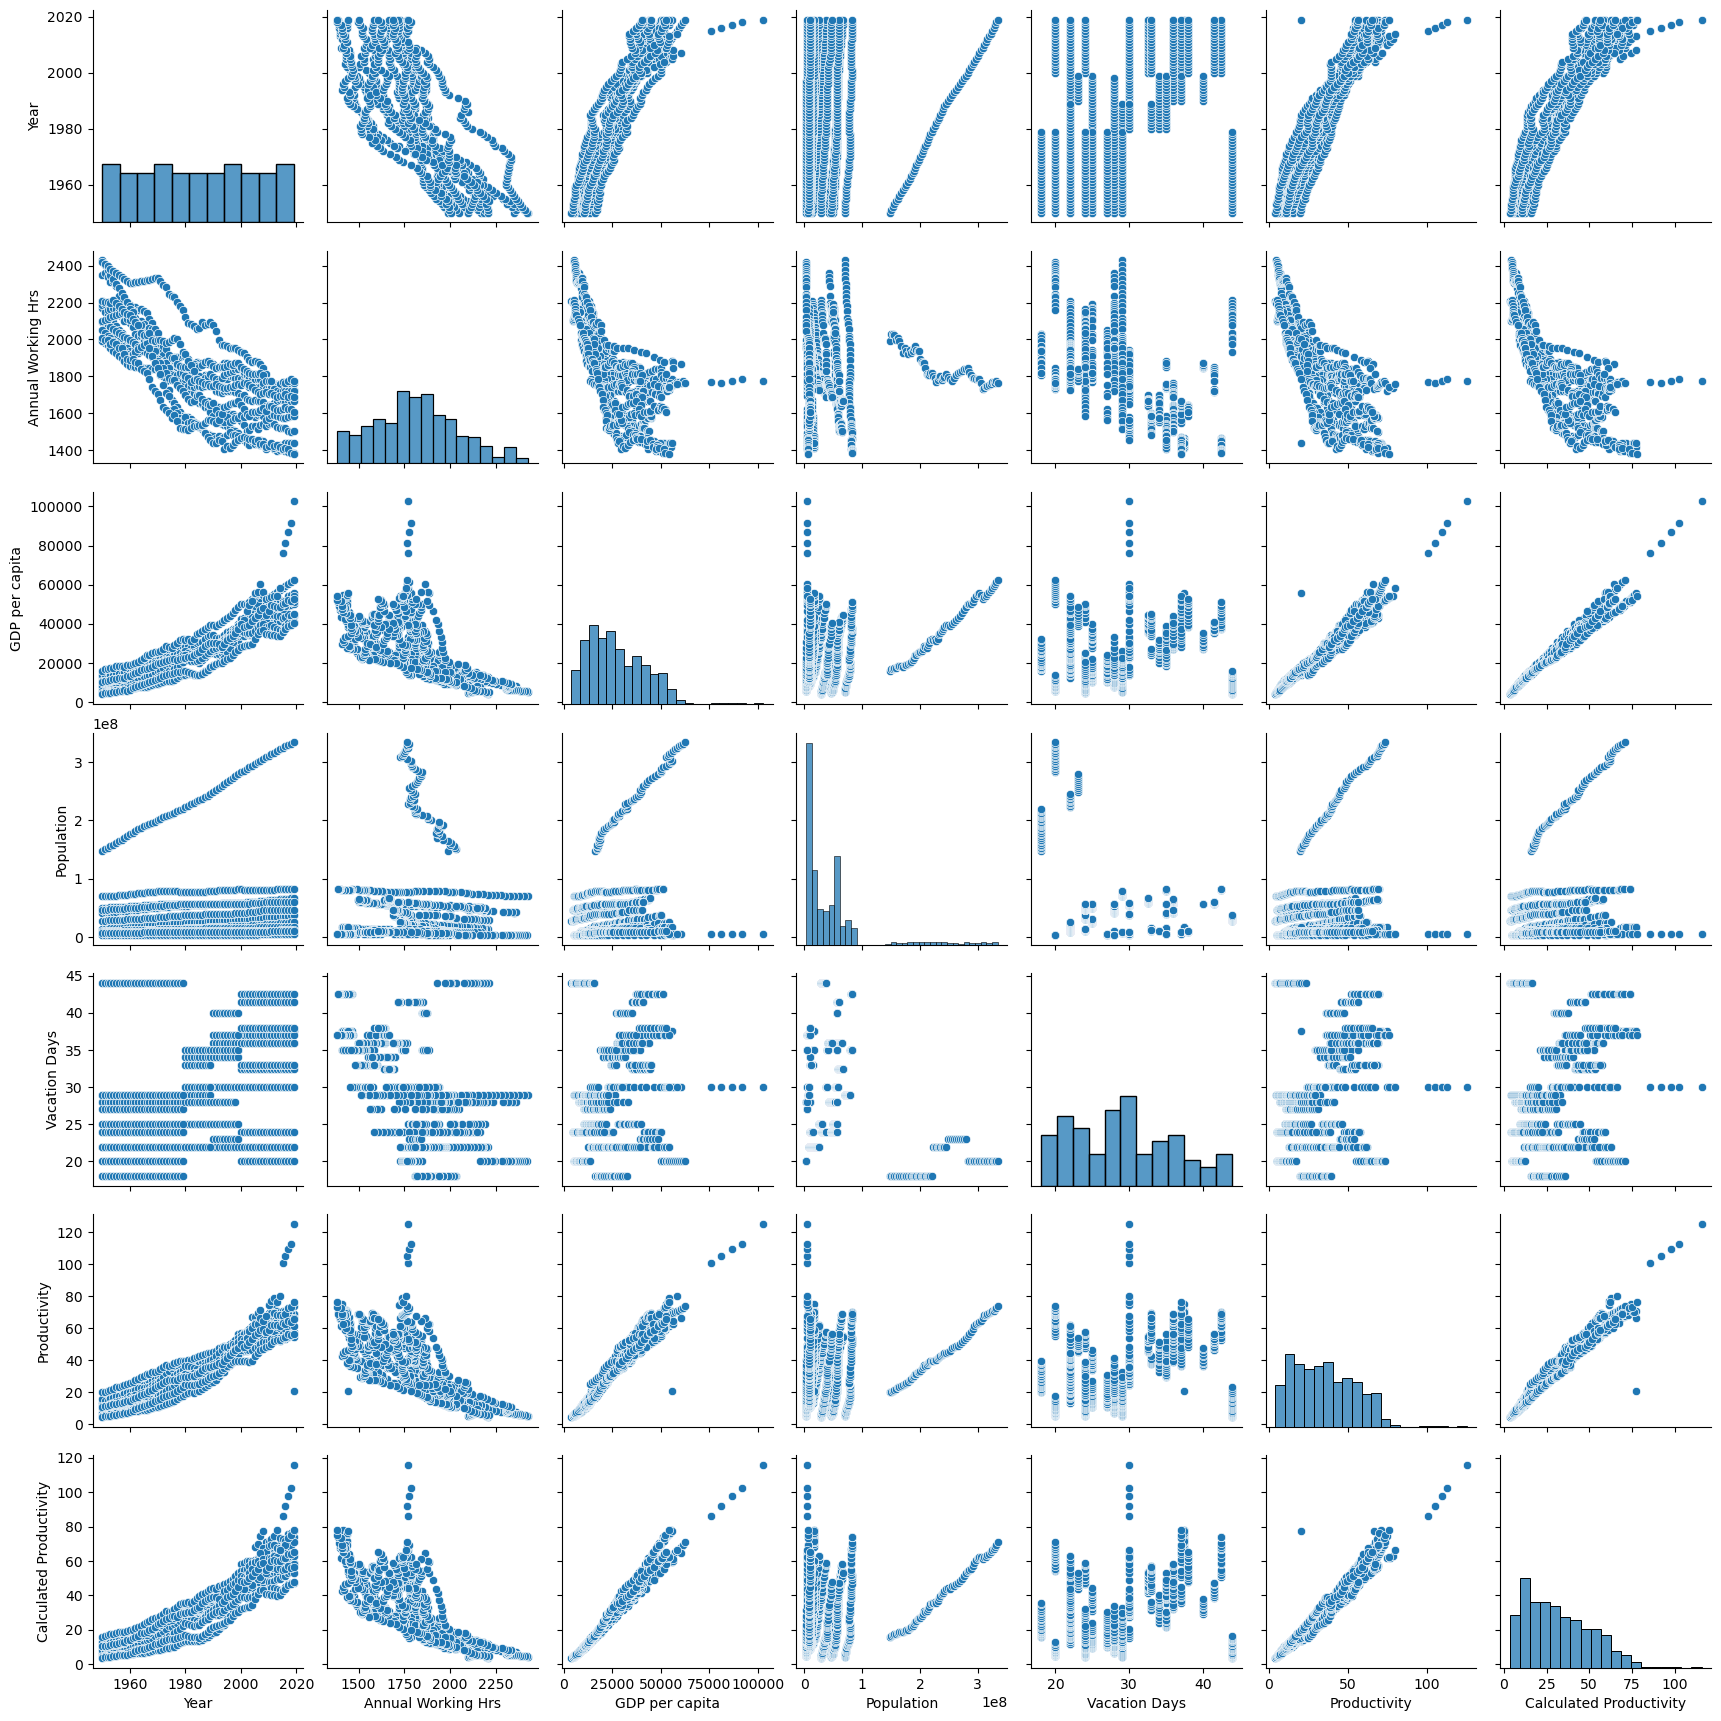

In [11]:
sns.pairplot(df)
df_s = df.copy()   
df_s.drop(df_s[df_s['Entity'] == 'United States'].index, inplace = True)
#Since the US data is having an impact on data visualization due to being an outlier, it might be a good idea to remove it for this.

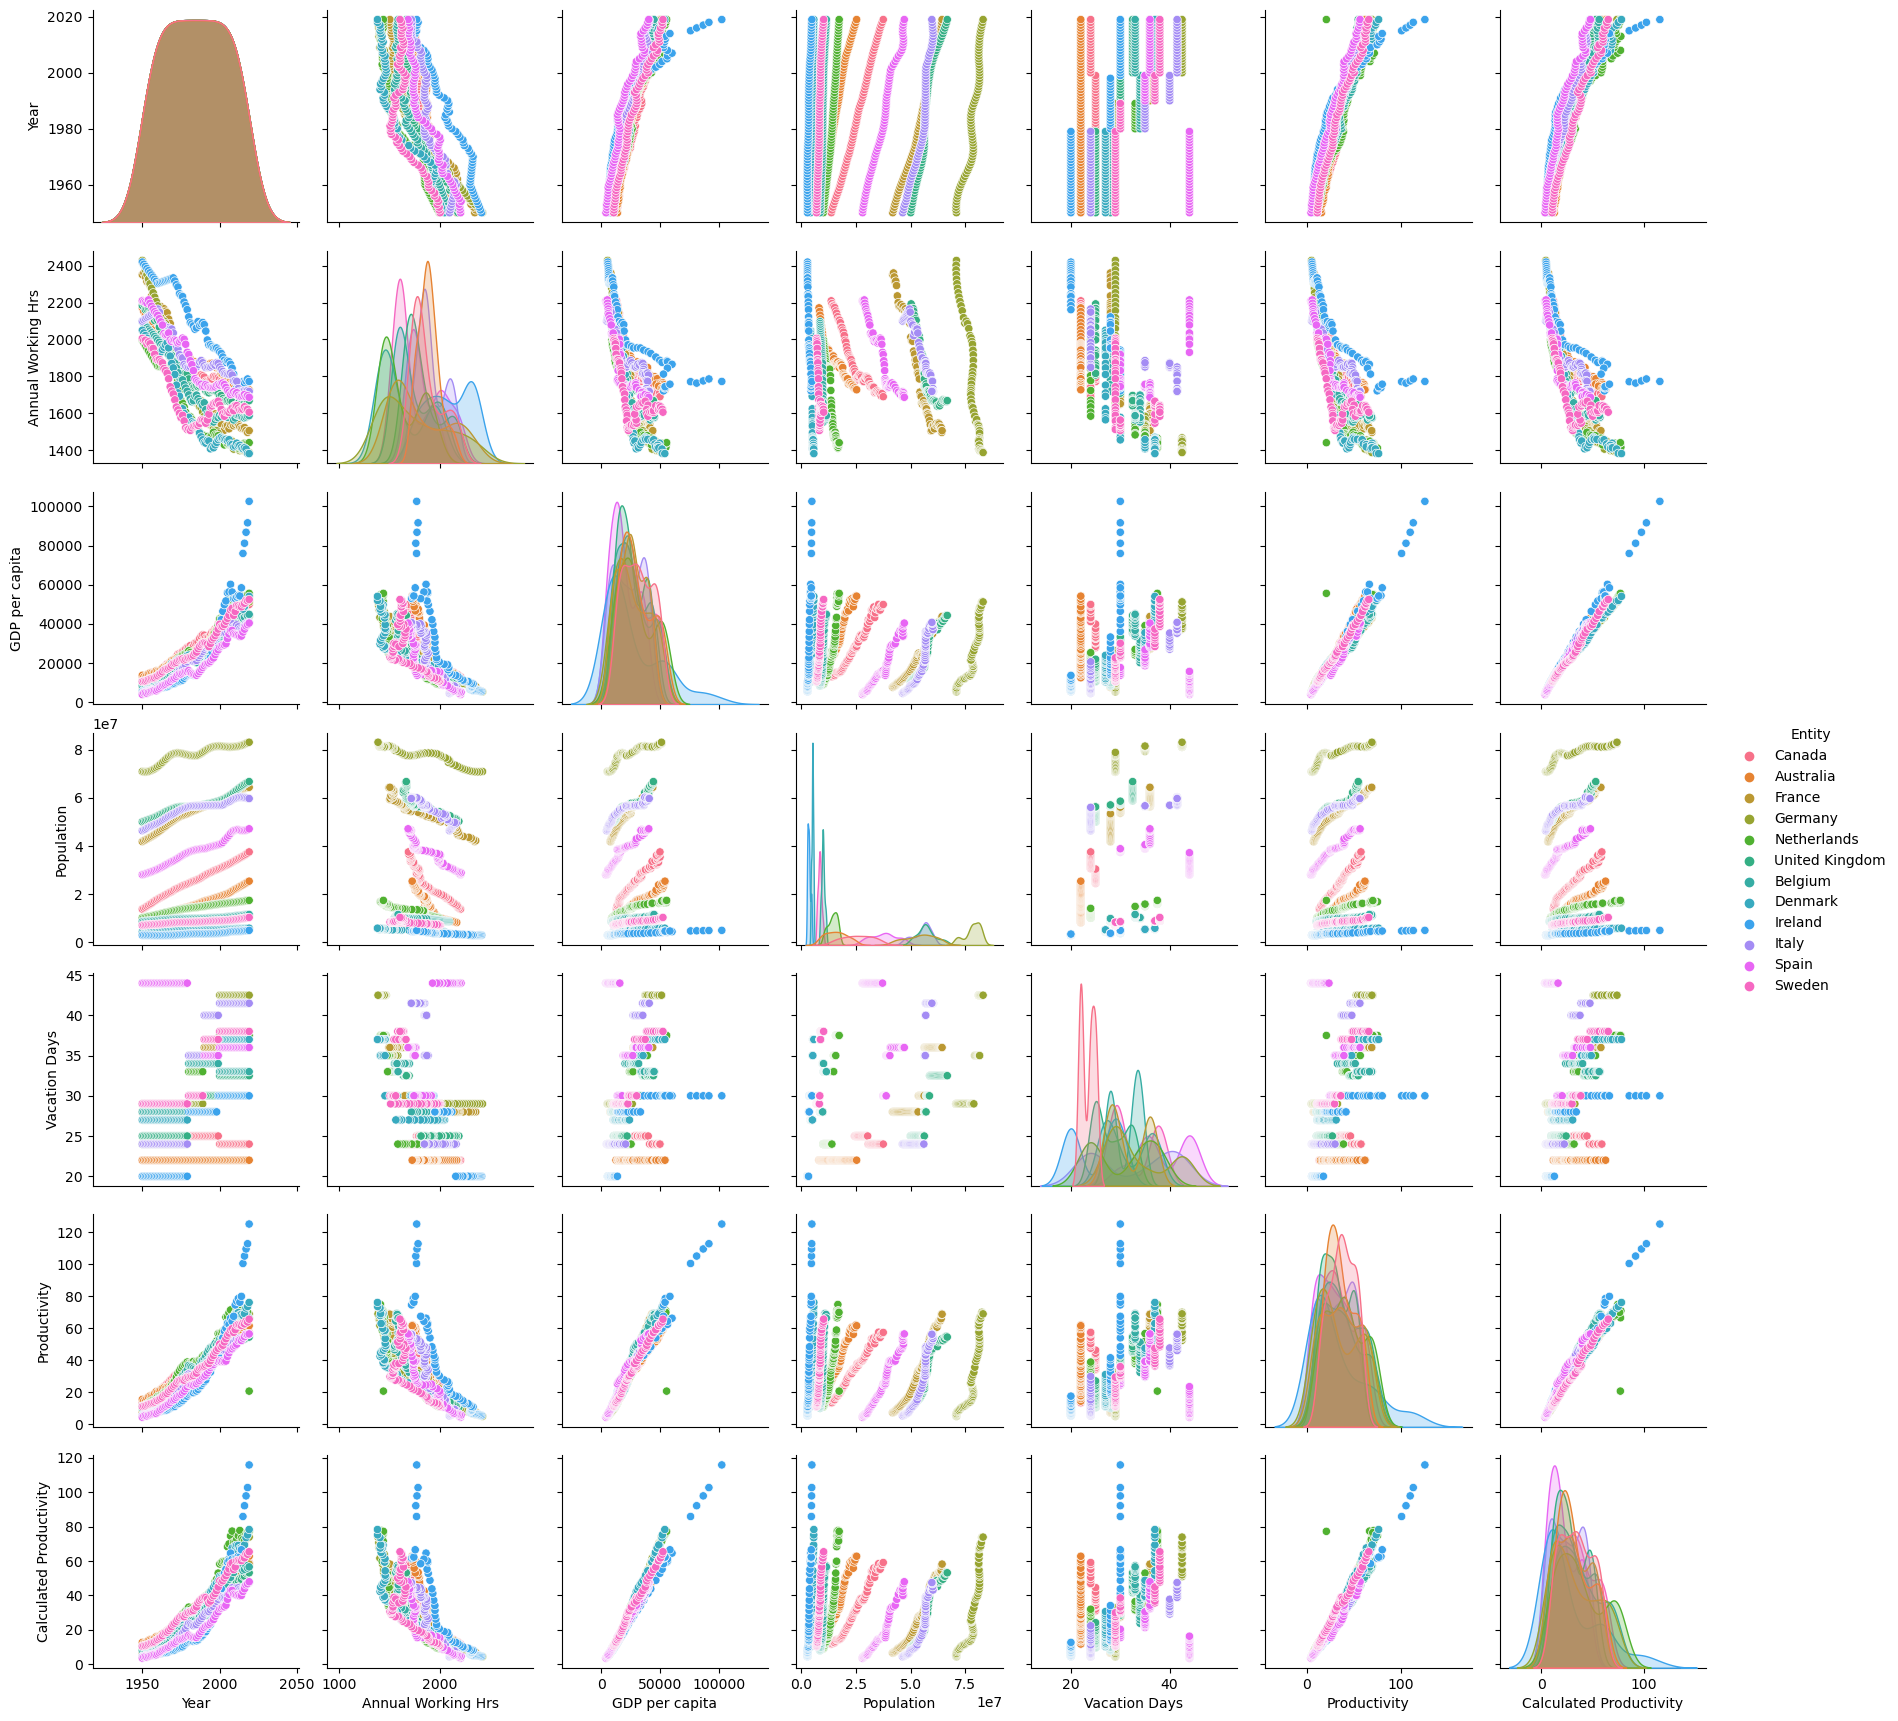

In [12]:
sns.pairplot(df_s, hue='Entity')
#From this some trends seem to emerge: as population increases, 
#average working hours decrease or alternatively, as year increases, average working hours decrease).

<AxesSubplot:>

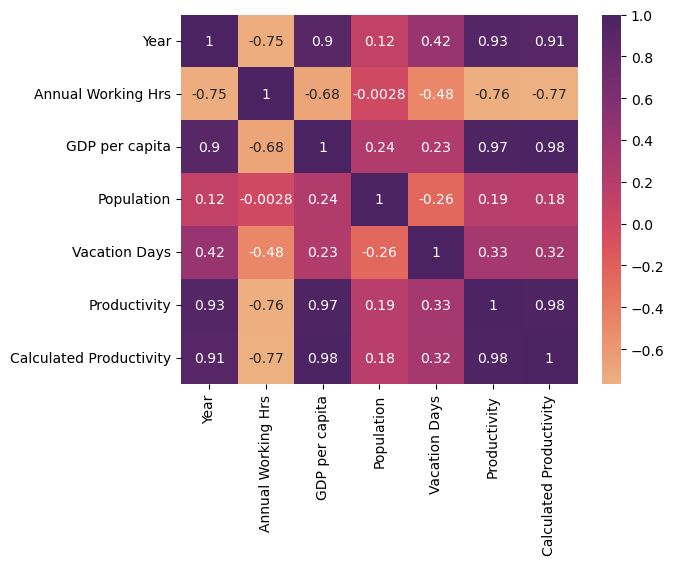

In [22]:
df_mx = df.corr()
df_mx
sns.heatmap(df_mx, annot = True, cmap = 'flare')
#Interestingly annual working hours is negatively correlated with productivity.

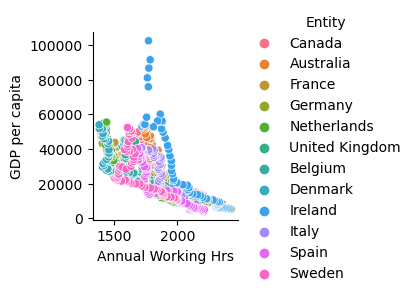

In [17]:
sns.pairplot(df_s, hue='Entity', x_vars = 'Annual Working Hrs', y_vars = 'GDP per capita')
#Some spikes in GDP per capita in ireland might be worth investigating

<AxesSubplot:xlabel='Vacation Days', ylabel='Productivity'>

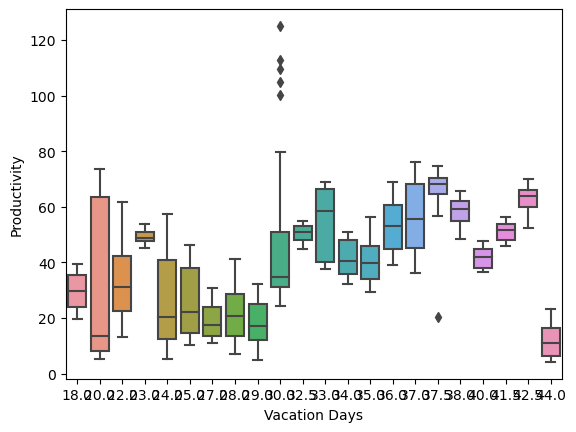

In [19]:
sns.boxplot(x='Vacation Days', y='Productivity', data = df)
#appears that between 30 and 42 vacation days per year is correlated with higher productivity.

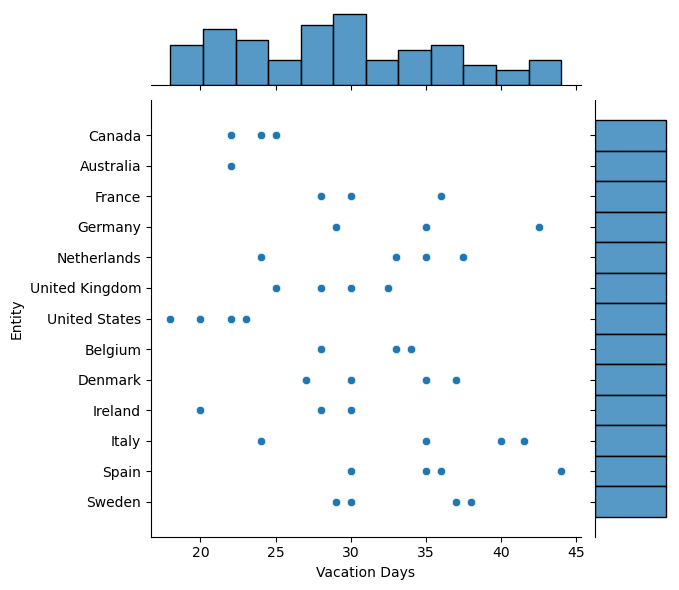

In [20]:
df_vac = [df['Vacation Days'] > 35]
sns.jointplot(x = 'Vacation Days', y = 'Entity', data = df)
#can see that there is less data available on vacation days in the 42-45 range, possibly leading to some outliers there.